In [15]:
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke, FakeKyiv

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp, Statevector, Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere, plot_distribution, plot_state_city
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator, SamplerV2 as Sampler
from qiskit.providers.basic_provider import BasicProvider
from qiskit.circuit.library import UGate, MCMTGate, ZGate, GroverOperator
backend = BasicProvider().get_backend('basic_simulator')
import numpy as np
from numpy import sqrt, pi, random
import matplotlib.pyplot as plt
import galois

1 + 2

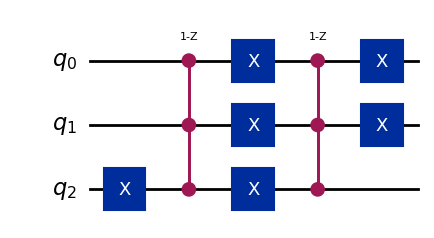

In [16]:
def grover_oracle(marked_states):
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    for target in marked_states:
        rev_target = target[::-1]
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        qc.x(zero_inds)
        qc.compose(MCMTGate(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

marked_states = ["011", "100"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

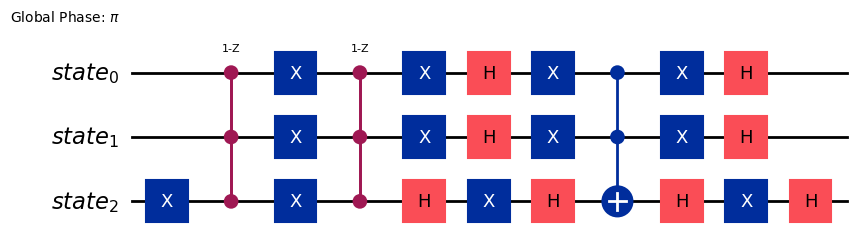

In [17]:
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

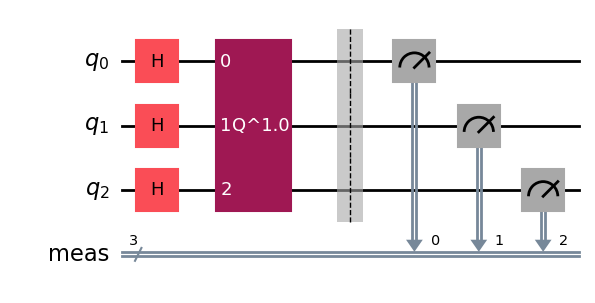

In [18]:
optimal_num_iterations = np.floor(
    np.pi / (4 * np.asin(np.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits))
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
qc.measure_all()
qc.draw(output="mpl", style="iqp")

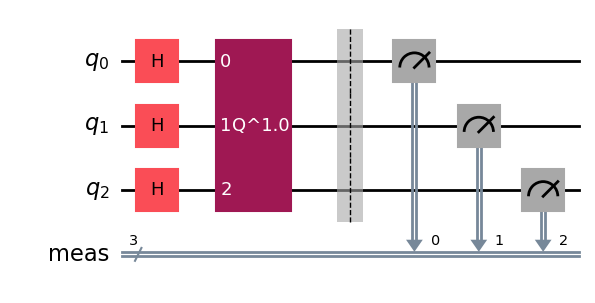

In [19]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

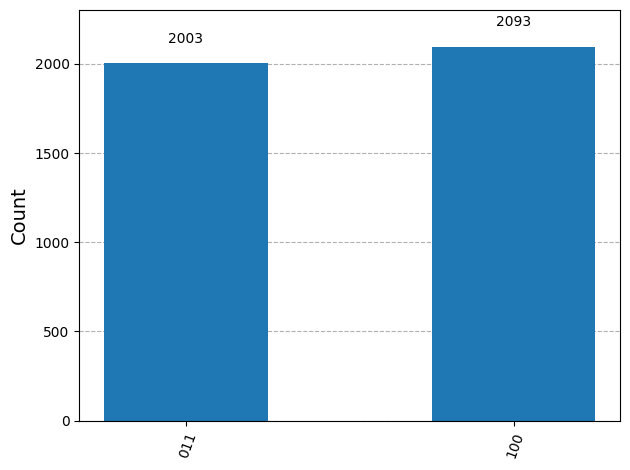

In [20]:
aer_sim = AerSimulator()
shots = 4096
t_qpe2 = transpile(circuit_isa, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

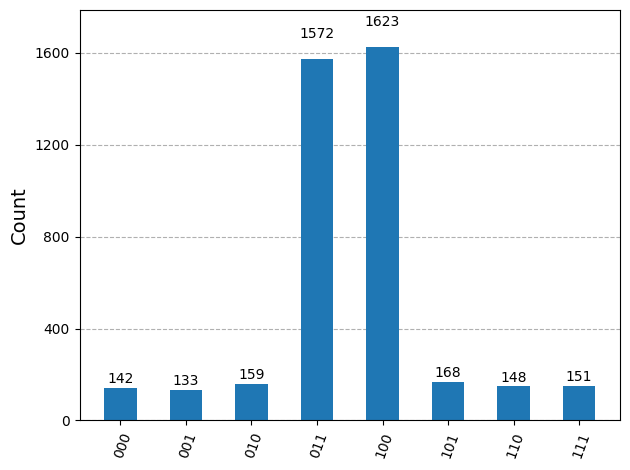

In [21]:
sim = FakeSherbrooke()
shots = 4096
t_qpe2 = transpile(circuit_isa, sim)
results = sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

3

iter_no=2.0


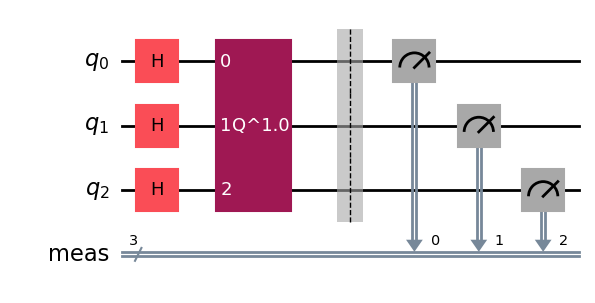

In [22]:
marked_states = ["010", "100"]

oracle = grover_oracle(marked_states)
grover_op = GroverOperator(oracle)

suboptimal_num_iterations = np.floor(
    np.pi / (4 * np.asin(np.sqrt(len(marked_states) / 2**grover_op.num_qubits))) + 1
)
print(f"iter_no={suboptimal_num_iterations}")

qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits))
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
qc.measure_all()
qc.draw(output="mpl", style="iqp")


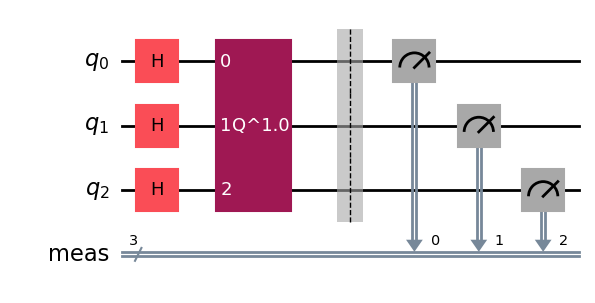

In [23]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

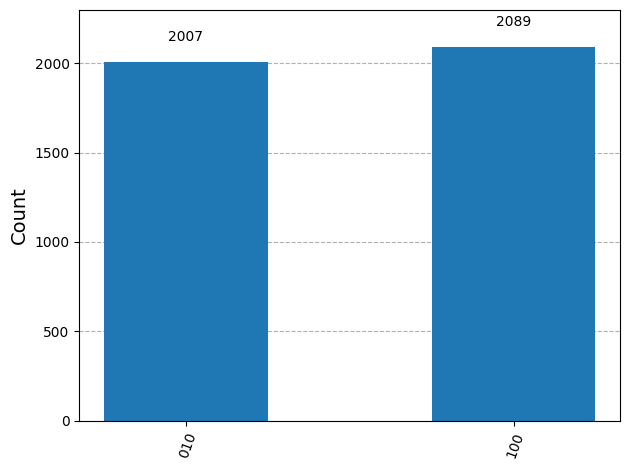

In [24]:
aer_sim = AerSimulator()
shots = 4096
t_qpe2 = transpile(circuit_isa, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

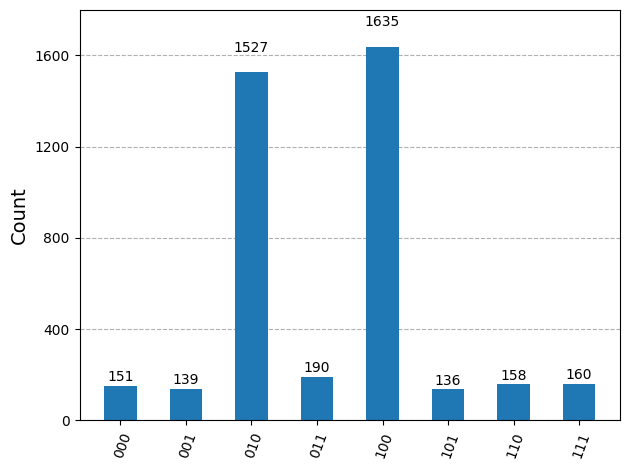

In [25]:
sim = FakeSherbrooke()
shots = 4096
t_qpe2 = transpile(circuit_isa, sim)
results = sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

4

iter_no=1


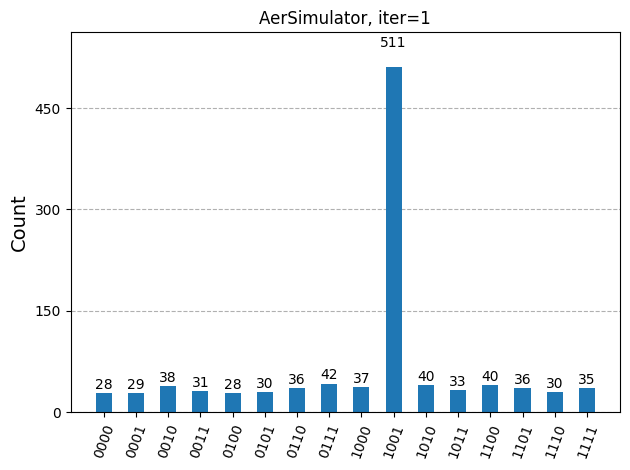

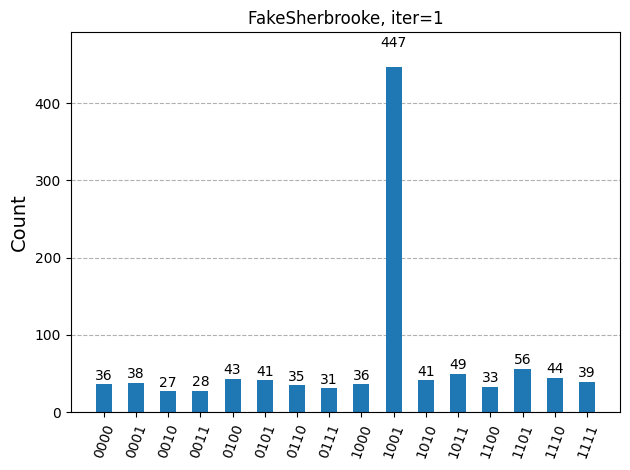

iter_no=5


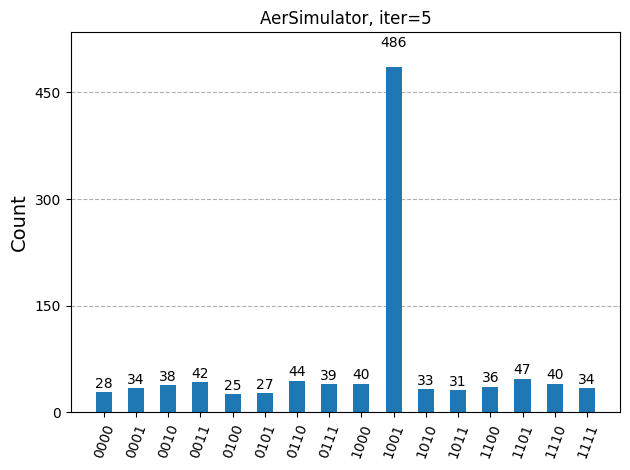

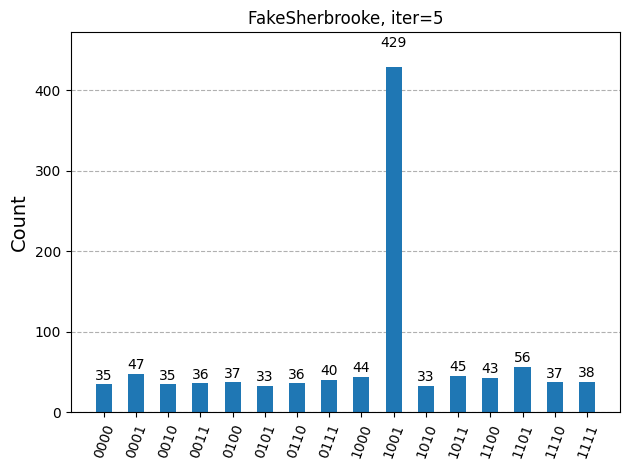

In [26]:
marked_states = ["1001"]

oracle = grover_oracle(marked_states)
grover_op = GroverOperator(oracle)

suboptimal_num_iterations = 1
print(f"iter_no={suboptimal_num_iterations}")

qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits))
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
qc.measure_all()
qc.draw(output="mpl", style="iqp")

result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title=f'AerSimulator, iter={suboptimal_num_iterations}'))

result = FakeSherbrooke().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title=f'FakeSherbrooke, iter={suboptimal_num_iterations}'))

suboptimal_num_iterations = 5
print(f"iter_no={suboptimal_num_iterations}")

qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits))
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
qc.measure_all()
qc.draw(output="mpl", style="iqp")

result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title=f'AerSimulator, iter={suboptimal_num_iterations}'))

result = FakeSherbrooke().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title=f'FakeSherbrooke, iter={suboptimal_num_iterations}'))

5

iter_no=4.0


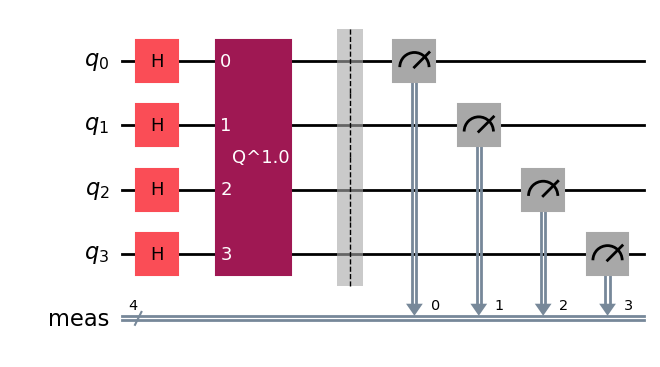

In [27]:
marked_states = ["1001"]

oracle = grover_oracle(marked_states)
grover_op = GroverOperator(oracle)

suboptimal_num_iterations = np.floor(
    np.pi / (4 * np.asin(np.sqrt(len(marked_states) / 2**grover_op.num_qubits))) + 1
)
print(f"iter_no={suboptimal_num_iterations}")

qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits))
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
qc.measure_all()
qc.draw(output="mpl", style="iqp")

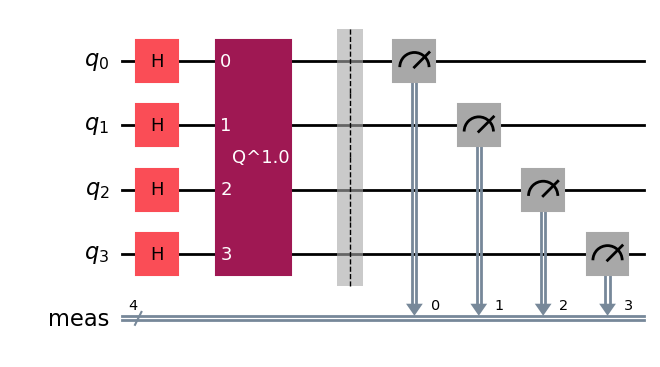

In [28]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

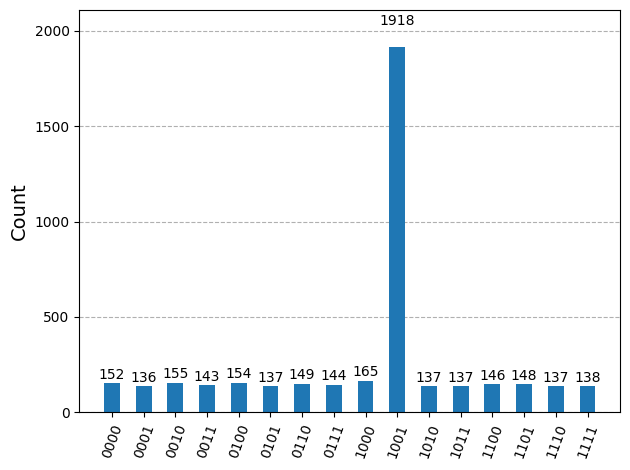

In [29]:
aer_sim = AerSimulator()
shots = 4096
t_qpe2 = transpile(circuit_isa, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

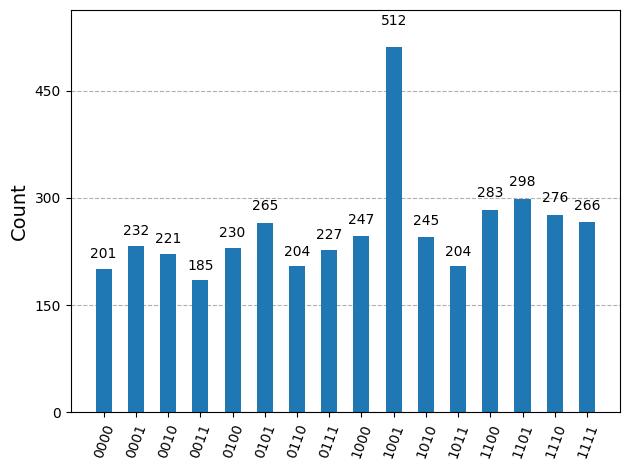

In [30]:
sim = FakeSherbrooke()
shots = 4096
t_qpe2 = transpile(circuit_isa, sim)
results = sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

6

iter_no=5.0


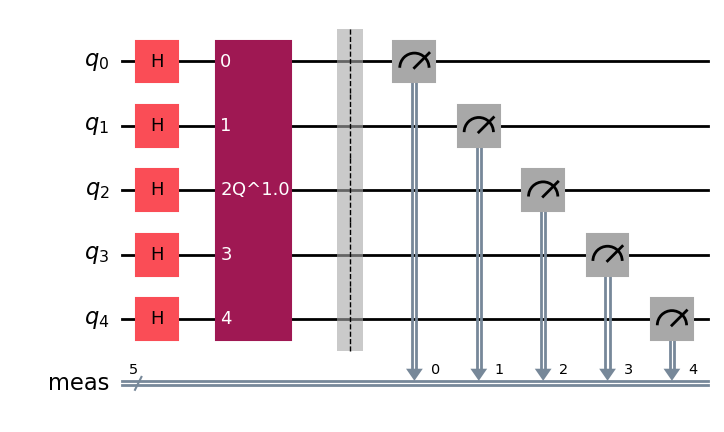

In [31]:
marked_states = ["00111"]

oracle = grover_oracle(marked_states)
grover_op = GroverOperator(oracle)

suboptimal_num_iterations = np.floor(
    np.pi / (4 * np.asin(np.sqrt(len(marked_states) / 2**grover_op.num_qubits))) + 1
)
print(f"iter_no={suboptimal_num_iterations}")

qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits))
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
qc.measure_all()
qc.draw(output="mpl", style="iqp")

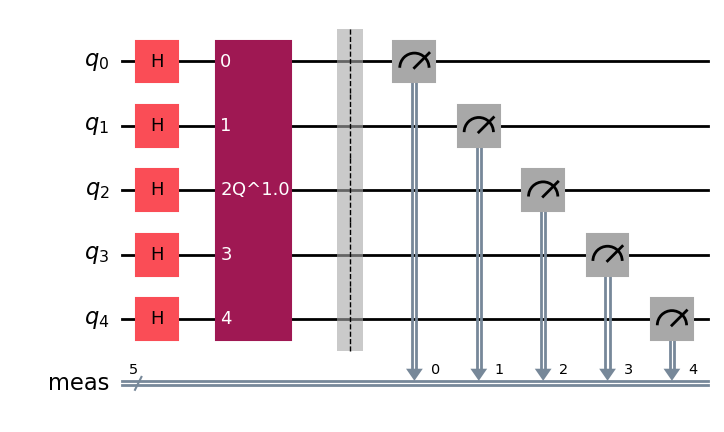

In [32]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

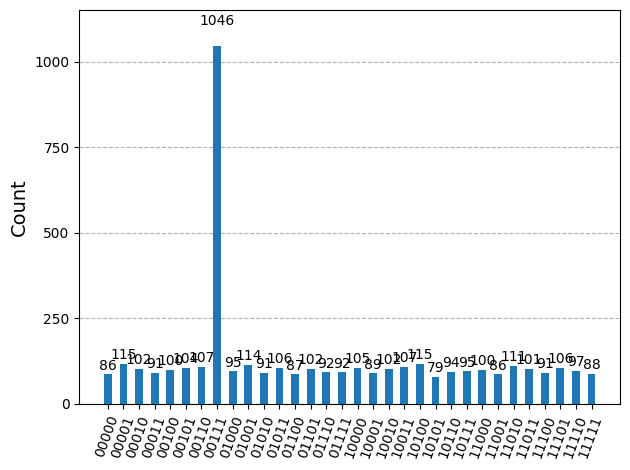

In [33]:
aer_sim = AerSimulator()
shots = 4096
t_qpe2 = transpile(circuit_isa, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

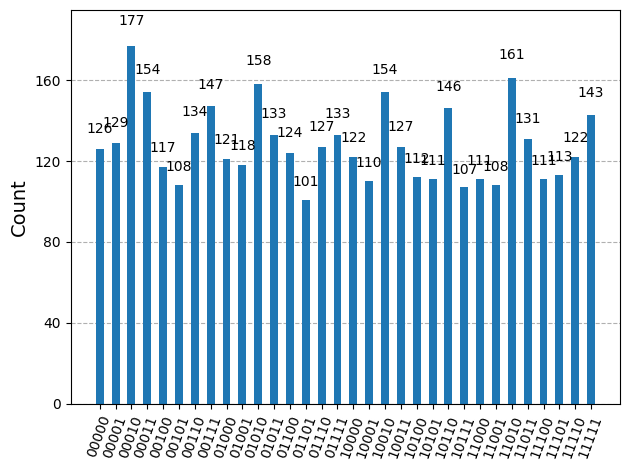

In [35]:
sim = FakeSherbrooke()
shots = 4096
t_qpe2 = transpile(circuit_isa, sim)
results = sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)